In [2]:
import os
import radiomics as rm
import nibabel as nib
import numpy as np
import os,sys
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import SimpleITK as sitk
from radiomics import featureextractor, getTestCase
%matplotlib inline
from scipy.stats import kurtosis
#from Predistim_Library import *
STUDY_PATH=os.path.join("/NAS","deathrow","protocoles","predistim")
from scipy.ndimage import gaussian_filter


In [4]:
for cpt in range(2,5) : 
    print(cpt)
    
        

2
3
4


### AVANT

In [15]:
SUBJ="06036ID"#"02049AT"
CMD=""
file=os.path.join(STUDY_PATH,'HCP',SUBJ,'T1w',SUBJ,'mri','T1FS_resliced.nii.gz')
CMD+=file+" "

PARA='R2' #R2 / QSM
file=os.path.join(STUDY_PATH,PARA,SUBJ,PARA+'_lin_3DT1.nii.gz') 
img_data=np.asanyarray(nib.load(file).dataobj)

CMD+=file+" "
PARA='QSM'
file=os.path.join(STUDY_PATH,PARA,SUBJ,PARA+'_lin_3DT1.nii.gz') 
CMD+=file+" "
struct_file=os.path.join(STUDY_PATH,'3DT1',SUBJ,'native_lab_'+SUBJ+'_resliced.nii.gz')
CMD+=struct_file+" "

#struct_file=os.path.join(STUDY_PATH,'HCP',SUBJ,'T1w',SUBJ,'mri','aparc+aseg_resliced.nii.gz')
#CMD+=struct_file+" "
#name_struct='FLASH_SN_L_'
#struct_file=os.path.join(STUDY_PATH,'3DT1',SUBJ,name_struct+SUBJ+'_on3DT1.nii.gz')
#CMD+=struct_file+" "
print(CMD)

/NAS/deathrow/protocoles/predistim/HCP/06036ID/T1w/06036ID/mri/T1FS_resliced.nii.gz /NAS/deathrow/protocoles/predistim/R2/06036ID/R2_lin_3DT1.nii.gz /NAS/deathrow/protocoles/predistim/QSM/06036ID/QSM_lin_3DT1.nii.gz /NAS/deathrow/protocoles/predistim/3DT1/06036ID/native_lab_06036ID_resliced.nii.gz 


In [12]:
SUBJ="02049AT"#"02075LP"
CMD=""
file=os.path.join(STUDY_PATH,'HCP',SUBJ,'T1w',SUBJ,'mri','T1FS_nativeT1_new.nii.gz')
CMD+=file+" "

#img_data=np.asanyarray(nib.load(file).dataobj)
PARA='R2' #R2 / QSM
file=os.path.join(STUDY_PATH,PARA,SUBJ,PARA+'_lin_3DT1.nii.gz') 
CMD+=file+" "
PARA='QSM'
file=os.path.join(STUDY_PATH,PARA,SUBJ,PARA+'_lin_3DT1.nii.gz') 
CMD+=file+" "
struct_file=os.path.join(STUDY_PATH,'3DT1',SUBJ,'native_lab_'+SUBJ+'_resliced.nii.gz')
CMD+=struct_file+" "

struct_file=os.path.join(STUDY_PATH,'HCP',SUBJ,'T1w',SUBJ,'mri','aparc+aseg_nativeT1_new.nii.gz')
CMD+=struct_file+" "
name_struct='FLASH_SN_L_'
struct_file=os.path.join(STUDY_PATH,'3DT1',SUBJ,name_struct+SUBJ+'_on3DT1.nii.gz')
CMD+=struct_file+" "
print(CMD)

/NAS/deathrow/protocoles/predistim/HCP/02049AT/T1w/02049AT/mri/T1FS_nativeT1_new.nii.gz /NAS/deathrow/protocoles/predistim/R2/02049AT/R2_lin_3DT1.nii.gz /NAS/deathrow/protocoles/predistim/QSM/02049AT/QSM_lin_3DT1.nii.gz /NAS/deathrow/protocoles/predistim/3DT1/02049AT/native_lab_02049AT_resliced.nii.gz /NAS/deathrow/protocoles/predistim/HCP/02049AT/T1w/02049AT/mri/aparc+aseg_nativeT1_new.nii.gz /NAS/deathrow/protocoles/predistim/3DT1/02049AT/FLASH_SN_L_02049AT_on3DT1.nii.gz 


/NAS/deathrow/protocoles/predistim/HCP/06057CT/T1w/06057CT/mri/T1FS_resliced.nii.gz
/NAS/deathrow/protocoles/predistim/3DT1/06057CT/native_lab_06057CT_resliced.nii.gz


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


4.528848254068404
7072
110.11597
4.528848568898905


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          1.,   1.,   1.,   3.,   3.,   3.,   1.,   5.,   3.,   6.,   5.,
          6.,   9.,  10.,  11.,  11.,  12.,  13.,  13.,  24.,  18.,  22.,
         23.,  31.,  23.,  38.,  38.,  43.,  42.,  48.,  65.,  50.,  70.,
         93., 118., 132., 184., 188., 237., 286., 318., 329., 363., 353.,
        348., 337., 315., 309., 283., 242., 231., 189., 162., 153., 152.,
        116.,  94.,  71.,  76.,  64.,  52.,  55.,  65.,  47.,  59.,  38.,
         37.,  35.,  33.,  32.,  24.,  19.,  32.,  24.,  27.,  19.,  15.,
         20.,  15.,   4.,   6.,   3.,   4.,   3.,   1.,   2.,   0.,   0.,
          3.]),
 array([ 11.288055 ,  12.276335 ,  13.264614 ,  14.2528925,  15.241172 ,
         16.22945  ,  17.21773  ,  18.206009 ,  19.194288 ,  20.182568 ,
         21.170847 ,  22.159126 ,  23.147406 ,  24.135683 ,  25.123962 ,
         26.112242 ,  27.100521 ,  28.0888   ,  29.07708  ,  30.06536  ,
         31.053638 ,  32.0

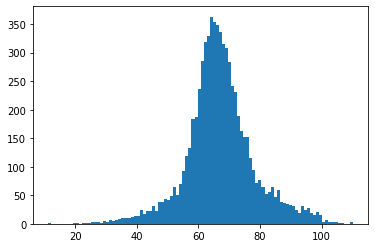

In [62]:
SUBJ="06057CT"#"02049AT"
PARA='R2' #R2 / QSM

#file=os.path.join(STUDY_PATH,PARA,SUBJ,PARA+'_lin_3DT1.nii.gz') 
file=os.path.join(STUDY_PATH,'HCP',SUBJ,'T1w',SUBJ,'mri','T1FS_resliced.nii.gz')
img_data=np.asanyarray(nib.load(file).dataobj)
struct_file=os.path.join(STUDY_PATH,'3DT1',SUBJ,'native_lab_'+SUBJ+'_resliced.nii.gz')
struct = nib.load(struct_file)

print(file)
print(struct_file)
#VOLBRAIN caudé 3/4, Putamen 5/6, thalamus 7/8, Globus pallidus 9/10, hipocampus 11/12, amigdala 13/14
struct_data=np.asanyarray(struct.dataobj,dtype=int)
tmp = ((struct_data==12) | (struct_data==11))
#tmp = (struct_data>0.5)
params = os.path.join("/","home","romain","SVN","python","romain","Params2.yaml")
sitk_img = sitk.GetImageFromArray(img_data)
sitk_mask = sitk.GetImageFromArray(tmp.astype(int))
extractor = featureextractor.RadiomicsFeatureExtractor(params)
result = extractor.execute(sitk_img,sitk_mask)
print(result['original_firstorder_Kurtosis'])
print(len(img_data[tmp]))
print(np.nanmax(img_data[tmp]))
#print(result)
sous_data_set=img_data[tmp]
print(kurtosis(sous_data_set,fisher=False))
plt.hist(sous_data_set,100)

In [63]:
np.mean(sous_data_set)

67.11653

/NAS/deathrow/protocoles/predistim/R2/06057CT/R2_lin_3DT1.nii.gz
/NAS/deathrow/protocoles/predistim/3DT1/06057CT/native_lab_06057CT_resliced.nii.gz


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


2.964911918989767
7072
31.705741391424795
2.964911918989767


(array([  5.,   7.,   2.,   9.,  12.,  10.,  12.,  22.,  17.,  15.,  24.,
         22.,  28.,  32.,  27.,  41.,  33.,  42.,  31.,  51.,  53.,  49.,
         52.,  68.,  66.,  72.,  81.,  93., 100., 112., 108., 162., 166.,
        191., 193., 168., 221., 190., 191., 186., 164., 169., 190., 174.,
        176., 168., 173., 187., 182., 168., 168., 114., 128., 128., 148.,
        109.,  95., 103.,  93., 108.,  86.,  77.,  76.,  79.,  88.,  60.,
         67.,  61.,  57.,  61.,  53.,  41.,  46.,  42.,  49.,  28.,  32.,
         22.,  24.,  31.,  17.,  12.,   5.,   9.,   7.,   4.,   2.,   3.,
          4.,   4.,   2.,   2.,   2.,   3.,   0.,   2.,   1.,   2.,   0.,
          2.]),
 array([20.63588964, 20.74658816, 20.85728667, 20.96798519, 21.07868371,
        21.18938223, 21.30008074, 21.41077926, 21.52147778, 21.6321763 ,
        21.74287481, 21.85357333, 21.96427185, 22.07497037, 22.18566888,
        22.2963674 , 22.40706592, 22.51776444, 22.62846295, 22.73916147,
        22.84985999, 22.96

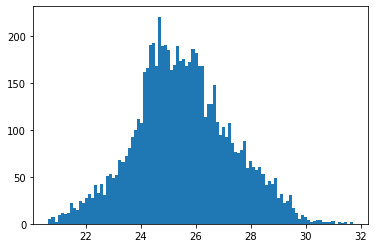

In [59]:
SUBJ="06057CT"#"02049AT"
PARA='R2' #R2 / QSM

file=os.path.join(STUDY_PATH,PARA,SUBJ,PARA+'_lin_3DT1.nii.gz') 
img_data=np.asanyarray(nib.load(file).dataobj)
img_data=np.abs(img_data)
img_data=gaussian_filter(img_data,sigma=2.548)

struct_file=os.path.join(STUDY_PATH,'3DT1',SUBJ,'native_lab_'+SUBJ+'_resliced.nii.gz')
struct = nib.load(struct_file)

print(file)
print(struct_file)
#VOLBRAIN caudé 3/4, Putamen 5/6, thalamus 7/8, Globus pallidus 9/10, hipocampus 11/12, amigdala 13/14
struct_data=np.asanyarray(struct.dataobj,dtype=int)
tmp = ((struct_data==12) | (struct_data==11))
#tmp = (struct_data>0.5)
params = os.path.join("/","home","romain","SVN","python","romain","Params2.yaml")
sitk_img = sitk.GetImageFromArray(img_data)
sitk_mask = sitk.GetImageFromArray(tmp.astype(int))
extractor = featureextractor.RadiomicsFeatureExtractor(params)
result = extractor.execute(sitk_img,sitk_mask)
print(result['original_firstorder_Kurtosis'])
print(len(img_data[tmp]))
print(np.nanmax(img_data[tmp]))
#print(result)
sous_data_set=img_data[tmp]
print(kurtosis(sous_data_set,fisher=False))
plt.hist(sous_data_set,100)

In [53]:
OLD_MAX=np.nanmax(img_data)
OLD_MIN=np.nanmin(img_data)
NEW_MIN=-1
NEW_MAX=1

X_FACTOR=(NEW_MAX-NEW_MIN)/(OLD_MAX-OLD_MIN)

115991.15541815001 0.006349491269091832 1.7242694947492404e-05


(array([1.000e+01, 1.700e+01, 2.500e+01, 4.300e+01, 5.400e+01, 7.100e+01,
        1.320e+02, 1.870e+02, 3.540e+02, 7.010e+02, 8.490e+02, 9.420e+02,
        1.088e+03, 1.247e+03, 1.194e+03, 9.600e+02, 4.710e+02, 3.190e+02,
        2.180e+02, 1.410e+02, 1.010e+02, 5.900e+01, 4.200e+01, 4.000e+01,
        2.900e+01, 2.600e+01, 1.500e+01, 1.600e+01, 1.700e+01, 1.300e+01,
        1.500e+01, 1.800e+01, 1.400e+01, 6.000e+00, 6.000e+00, 4.000e+00,
        7.000e+00, 4.000e+00, 8.000e+00, 7.000e+00, 2.000e+00, 6.000e+00,
        2.000e+00, 5.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

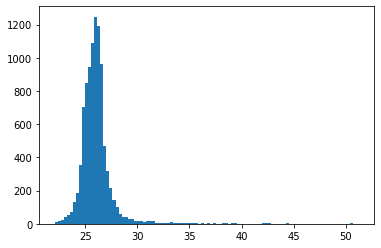

In [57]:
print(OLD_MAX,OLD_MIN,X_FACTOR)
plt.hist(sous_data_set,100)

(array([1.000e+01, 1.700e+01, 2.500e+01, 4.300e+01, 5.400e+01, 7.100e+01,
        1.320e+02, 1.870e+02, 3.540e+02, 7.010e+02, 8.490e+02, 9.420e+02,
        1.088e+03, 1.247e+03, 1.194e+03, 9.600e+02, 4.710e+02, 3.190e+02,
        2.180e+02, 1.410e+02, 1.010e+02, 5.900e+01, 4.200e+01, 4.000e+01,
        2.900e+01, 2.600e+01, 1.500e+01, 1.600e+01, 1.700e+01, 1.300e+01,
        1.500e+01, 1.800e+01, 1.400e+01, 6.000e+00, 6.000e+00, 4.000e+00,
        7.000e+00, 4.000e+00, 8.000e+00, 7.000e+00, 2.000e+00, 6.000e+00,
        2.000e+00, 5.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

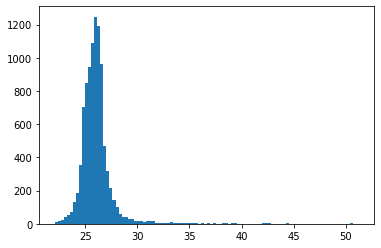

In [58]:
img_data=img_data-OLD_MIN*X_FACTOR-NEW_MIN
plt.hist(sous_data_set,100)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


53.094092359238466
9542
51.28993806293189
53.094092359238466


(array([1.000e+01, 1.700e+01, 2.500e+01, 4.300e+01, 5.400e+01, 7.100e+01,
        1.320e+02, 1.870e+02, 3.540e+02, 7.010e+02, 8.490e+02, 9.420e+02,
        1.088e+03, 1.247e+03, 1.194e+03, 9.600e+02, 4.710e+02, 3.190e+02,
        2.180e+02, 1.410e+02, 1.010e+02, 5.900e+01, 4.200e+01, 4.000e+01,
        2.900e+01, 2.600e+01, 1.500e+01, 1.600e+01, 1.700e+01, 1.300e+01,
        1.500e+01, 1.800e+01, 1.400e+01, 6.000e+00, 6.000e+00, 4.000e+00,
        7.000e+00, 4.000e+00, 8.000e+00, 7.000e+00, 2.000e+00, 6.000e+00,
        2.000e+00, 5.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

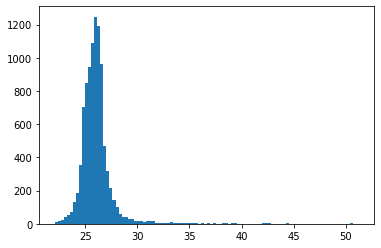

In [56]:
sitk_img = sitk.GetImageFromArray(img_data)
sitk_mask = sitk.GetImageFromArray(tmp.astype(int))
extractor = featureextractor.RadiomicsFeatureExtractor(params)
result = extractor.execute(sitk_img,sitk_mask)
print(result['original_firstorder_Kurtosis'])
print(len(img_data[tmp]))
print(np.nanmax(img_data[tmp]))
#print(result)
sous_data_set=img_data[tmp]
print(kurtosis(sous_data_set,fisher=False))
plt.hist(sous_data_set,100)